# Exploratory Data Analysis on Uber Data


We will use the data of a single Uber user for the year 2016 uploaded on Kaggle here: https://www.kaggle.com/datasets/zusmani/uberdrives

In [2]:
import pandas as pd
import numpy as np
import datetime
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)


In [3]:
df=pd.read_csv("uber.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.shape

(1156, 7)

In [6]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [7]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df.isnull().sum()                             #method1

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [9]:
df=df.dropna()

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]              #method2

[]

we notice that the date columns contain some composite information such as day, day of the week, month, and time. 
Separating them gives us more granular information to explore.

In [11]:
df["START_DATE*"]=pd.to_datetime(df["START_DATE*"], format="%m/%d/%Y %H:%M" )
df["END_DATE*"]=pd.to_datetime(df["END_DATE*"], format="%m/%d/%Y %H:%M" )
df["HOUR"]=[x.hour for x in df["START_DATE*"] ]
df["DAY"]=[x.day for x in df["START_DATE*"] ]
df["MONTH"]=[x.month for x in df["START_DATE*"] ]
df["WEEKDAY"]=[calendar.day_name[x.dayofweek]for x in df["START_DATE*"] ]
df["DAY_OF_WEEK"]=[x.dayofweek for x in df["START_DATE*"] ]

In [12]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


In [13]:
df.shape

(653, 12)

let’s see what the “category” column looks like using the countplot() method of seaborn. This method will count the frequency
of every unique value in the column and plot a bar graph.



<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

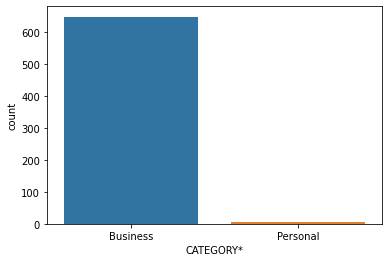

In [14]:
sns.countplot(x='CATEGORY*',data=df)

Similarly, for “purpose” we get:

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

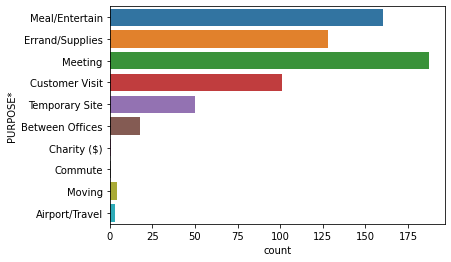

In [15]:
sns.countplot(y='PURPOSE*',data=df)

Using these two graphs, it is clear that users most used Uber for work-related meetings and meals most of the time. 
Other significant purposes include errands and customer visits. We can presume that the user works in a client-oriented service
industry that involves frequent traveling and dining with clients in the city.

Plotting the distance column as a histogram shows that the distances traveled by the user are relatively short, 
which validates our assumption about the user’s work-related travels.



<AxesSubplot:ylabel='Frequency'>

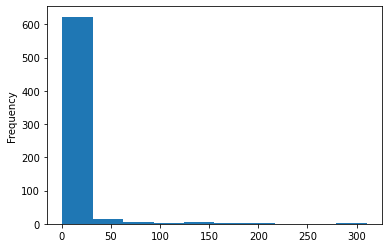

In [16]:
df["MILES*"].plot.hist()

Next, let us see at what time of the day the user rides an Uber the most.

Text(0.5, 1.0, 'number of trips vs hours')

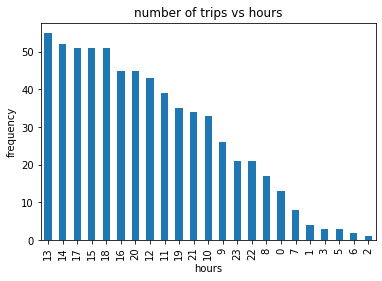

In [17]:
hours=df["HOUR"].value_counts()
hours.plot(kind="bar")
plt.xlabel("hours")
plt.ylabel("frequency")
plt.title("number of trips vs hours")

It is very apparent here that the user travels during lunch hours and in the early evenings more than the rest of the day.
It might be, so that client visits or client lunches occur more frequently between 1 PM-5 PM than the rest of the day.

At a level above a single day, we can look at the user's travel patterns on different days of the week.

Text(0.5, 1.0, 'number of trips vs days')

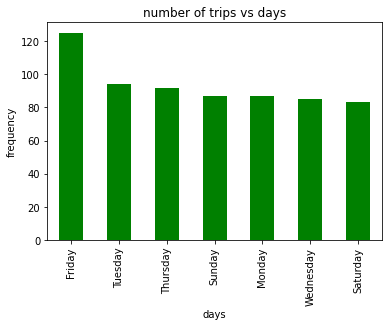

In [18]:
days=df["WEEKDAY"].value_counts()
days.plot(kind="bar",color="green")
plt.xlabel("days")
plt.ylabel("frequency")
plt.title("number of trips vs days")

While the user travels almost regularly each day of the week, he travels more on Fridays. Since we know he travels in the 
evenings too, we can assume that the additional number of trips on Fridays might be recreational.

Further, we can also look at the month-wise distribution of Uber trips.



Text(0.5, 1.0, 'number of trips vs months')

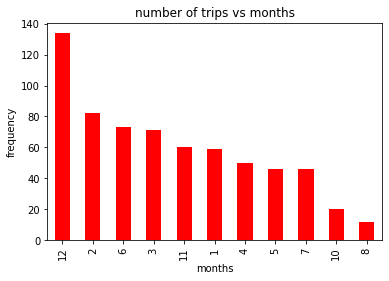

In [19]:
months=df["MONTH"].value_counts()
months.plot(kind="bar",color="red")
plt.xlabel("months")
plt.ylabel("frequency")
plt.title("number of trips vs months")

Following the steps of insight generation mentioned at the beginning of this article, we must point out how there were 
significantly more trips in December 2016 for this user while the rest of the months fall within a specific range.

Let’s see on which days of December the user traveled in an Uber:



Text(0.5, 1.0, 'number of trips vs days of december')

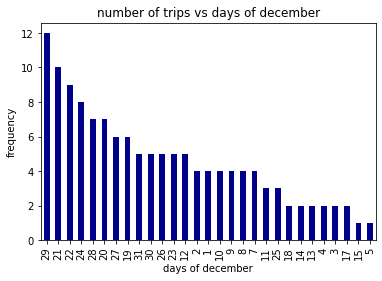

In [20]:
day_of_dec=df["DAY"][df["MONTH"]==12].value_counts()
day_of_dec.plot(kind="bar",color="darkblue")
plt.xlabel("days of december")
plt.ylabel("frequency")
plt.title("number of trips vs days of december")

As expected, the user traveled a lot during the Christmas break. And it is safe to assume that these trips were part of the
trips taken during the holiday season.

Now, taking a different direction, let’s see where the user traveled to and from in an Uber.

Text(0.5, 1.0, 'pickup point vs frequency')

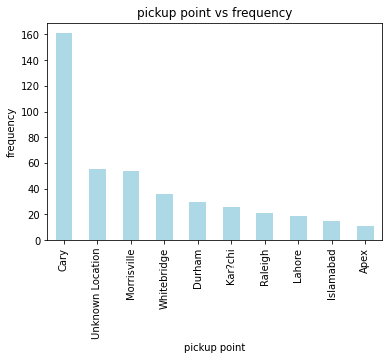

In [21]:
start=df["START*"].value_counts().nlargest(10)
start.plot(kind="bar",color="lightblue")
plt.xlabel("pickup point")
plt.ylabel("frequency")
plt.title("pickup point vs frequency")

The maximum number of trips start from Cary could mean that the user either resides or works in this region.

Similarly, let’s also look at the destination of these trips.



Text(0.5, 1.0, 'pickup point vs frequency')

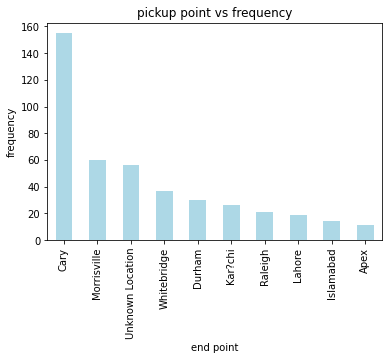

In [22]:
stop=df["STOP*"].value_counts().nlargest(10)
stop.plot(kind="bar",color="lightblue")
plt.xlabel("end point")
plt.ylabel("frequency")
plt.title("pickup point vs frequency")

An interesting observation is how most of these places are the same as the pick-up points. This confirms the intuition that the
user usually commutes around Cary or Morrisville.

As we deduced, the user travels very frequently between Cary and Morrisville.

So, we have seen how much knowledge this elementary dataset can give us about the user’s riding patterns and the user himself. These kinds of insights, when performed on a more complex level, can be an asset to recommendation systems or services that need to track a user’s behavior and act accordingly – streaming services, health monitoring apps, e-commerce websites, etc.



# Exploratory Data Analysis of Boston Uber Data

Similar to the Personal Uber Data, we also have the relevant data columns in this dataset. 
First, download the data from Kaggle:https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [38]:
df1=pd.read_csv("boston_uber.csv")
df1.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [33]:
df1.shape

(693071, 57)

In [34]:
df1.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [35]:
df1.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [36]:
df1.isnull().sum()  

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Text(0.5, 1.0, 'number of trips vs hours')

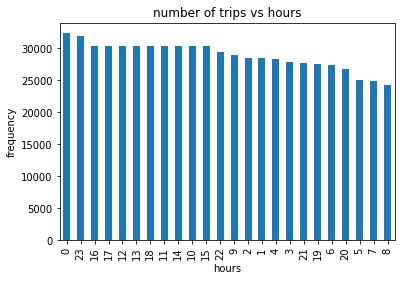

In [24]:
hours=df1["hour"].value_counts()                   #Let’s see the most common pick-up hours for Uber rides in Boston.
hours.plot(kind="bar")
plt.xlabel("hours")
plt.ylabel("frequency")
plt.title("number of trips vs hours")

As we can see, the result is very different from the travel patterns of a single person. Given Uber’s popularity, 
rides are almost equally frequent at all day hours (and night). However, more rides are ordered towards midnight
or during business hours in the afternoon.

In [25]:
day_week=[calendar.day_name[x.dayofweek] for x in pd.to_datetime(df1["datetime"],format="%Y/%m/%d %H:%M:%S")]
day_week=pd.Series(day_week)

Text(0.5, 1.0, 'day vs frequency')

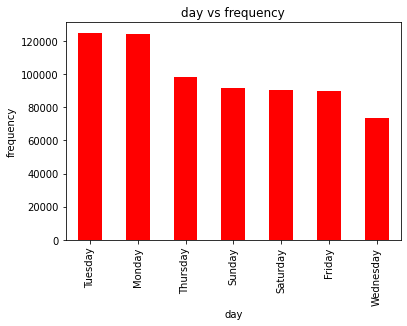

In [26]:
days=day_week.value_counts()
days.plot(kind="bar",color="red")
plt.xlabel("day")
plt.ylabel("frequency")
plt.title("day vs frequency")

Interestingly, more rides are ordered on the weekdays of Monday and Tuesday than on most. This might indicate active business
meetings or late-night outings, as seen in the previous graph.

Text(0.5, 1.0, 'number of trips vs months')

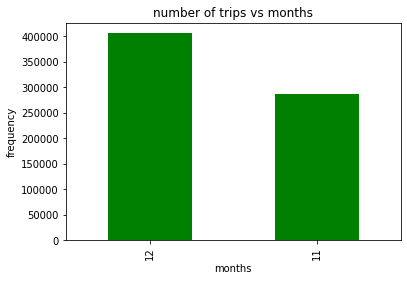

In [27]:
months=df1["month"].value_counts()
months.plot(kind="bar",color="green")
plt.xlabel("months")
plt.ylabel("frequency")
plt.title("number of trips vs months")

The data only contains details of rides in Nov and December 2018. However, more rides were ordered in December similar to the 
personal Uber data analysis. 

Text(0.5, 1.0, 'number of trips vs days of december')

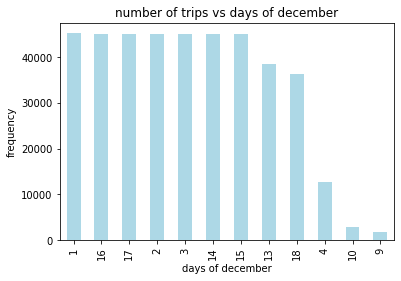

In [28]:
day_of_dec=df1["day"][df1["month"]==12].value_counts()
day_of_dec.plot(kind="bar",color="lightblue")
plt.xlabel("days of december")
plt.ylabel("frequency")
plt.title("number of trips vs days of december")

Also, we note that there were no especially busy pickup or drop-off points in Boston, and most popular locations received a 
similar number of pick-up and drop-off requests. The Financial District (the business hub of Boston) received slightly more 
traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.



Text(0.5, 1.0, 'pickup point vs frequency')

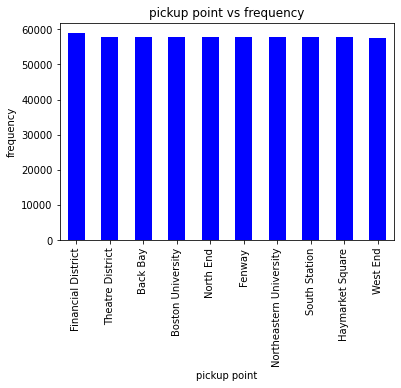

In [29]:
start=df1["source"].value_counts().nlargest(10)
start.plot(kind="bar",color="blue")
plt.xlabel("pickup point")
plt.ylabel("frequency")
plt.title("pickup point vs frequency")

Text(0.5, 1.0, 'end point vs frequency')

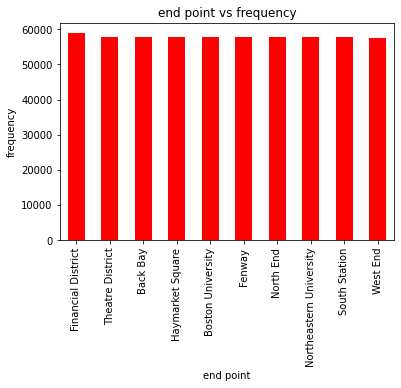

In [30]:
start=df1["destination"].value_counts().nlargest(10)
start.plot(kind="bar",color="red")
plt.xlabel("end point")
plt.ylabel("frequency")
plt.title("end point vs frequency")

Finally, let’s see which types of Uber cabs do people prefer in Boston:

Text(0.5, 1.0, 'cab_type vs frequency')

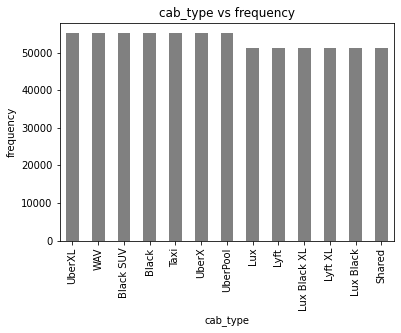

In [31]:
cabtype=df1["name"].value_counts()
cabtype.plot(kind="bar",color="grey")
plt.xlabel("cab_type")
plt.ylabel("frequency")
plt.title("cab_type vs frequency")